In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ')

In [3]:
print(df.dtypes)

1:Date                              object
2:Time                              object
3:Temperature_Comedor_Sensor       float64
4:Temperature_Habitacion_Sensor    float64
5:Weather_Temperature              float64
6:CO2_Comedor_Sensor               float64
7:CO2_Habitacion_Sensor            float64
8:Humedad_Comedor_Sensor           float64
9:Humedad_Habitacion_Sensor        float64
10:Lighting_Comedor_Sensor         float64
11:Lighting_Habitacion_Sensor      float64
12:Precipitacion                   float64
13:Meteo_Exterior_Crepusculo       float64
14:Meteo_Exterior_Viento           float64
15:Meteo_Exterior_Sol_Oest         float64
16:Meteo_Exterior_Sol_Est          float64
17:Meteo_Exterior_Sol_Sud          float64
18:Meteo_Exterior_Piranometro      float64
19:Exterior_Entalpic_1               int64
20:Exterior_Entalpic_2               int64
21:Exterior_Entalpic_turbo           int64
22:Temperature_Exterior_Sensor     float64
23:Humedad_Exterior_Sensor         float64
24:Day_Of_W

In [4]:
df=df.rename(columns={"1:Date":"Date",
                      "2:Time":"Time",
                      "3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

In [5]:
df

,Date,Time,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,...,15:Sunlight_West,16:Sunlight_East,17:Sunlight_South,18:Sun_Irradiance,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,0.00,0.000,-3.12000,0,0,0,16.0700,39.0800,3.0
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,0.00,0.000,-2.80800,0,0,0,16.0400,38.9680,3.0
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,0.00,0.000,-2.96400,0,0,0,16.0160,38.9467,3.0
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,0.00,0.000,-3.02933,0,0,0,15.9427,39.0760,3.0
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,0.00,0.000,-2.88600,0,0,0,15.8627,40.0413,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.43400,0,0,0,16.6180,49.2960,3.0
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.85200,0,0,0,16.4013,50.0373,3.0
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.83000,0,0,0,16.2607,50.0587,3.0
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.94930,0,0,0,16.2367,49.8400,3.0


In [6]:
df['Year']=[d.split('/')[2] for d in df.Date]
df['Month']=[d.split('/')[1] for d in df.Date]
df['Day']=[d.split('/')[0] for d in df.Date]
df['Hour']=[d.split(':')[0] for d in df.Time]
df['Minutes']=[d.split(':')[1] for d in df.Time]

In [7]:
df #All new columns are added to the end of the dataframe

,Date,Time,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,...,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week,Year,Month,Day,Hour,Minutes
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0,0,16.0700,39.0800,3.0,2012,04,18,00,00
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0,0,16.0400,38.9680,3.0,2012,04,18,00,15
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0,0,16.0160,38.9467,3.0,2012,04,18,00,30
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0,0,15.9427,39.0760,3.0,2012,04,18,00,45
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0,0,15.8627,40.0413,3.0,2012,04,18,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0,0,16.6180,49.2960,3.0,2012,04,11,05,30
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,0,0,16.4013,50.0373,3.0,2012,04,11,05,45
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,0,0,16.2607,50.0587,3.0,2012,04,11,06,00
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,0,0,16.2367,49.8400,3.0,2012,04,11,06,15


In [8]:
target = df['5:Weather_Temperature']
x = df.drop(['Date','Time','6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)
x.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,Year,Month,Day,Hour,Minutes
0,20.2000,19.8000,13.0,31.5800,30.1600,11.7200,14.1600,0.65,0.000000,0.0,-3.12000,16.0700,39.0800,2012,04,18,00,00
1,20.1593,19.7600,13.0,31.6240,30.0613,11.5240,14.7600,0.65,0.000000,0.0,-2.80800,16.0400,38.9680,2012,04,18,00,15
2,20.0740,19.6580,13.0,31.6507,30.1773,11.6220,14.9547,0.65,0.088000,0.0,-2.96400,16.0160,38.9467,2012,04,18,00,30
3,19.9773,19.5833,13.0,31.6987,30.2560,11.7847,15.0520,0.65,0.127333,0.0,-3.02933,15.9427,39.0760,2012,04,18,00,45
4,19.8933,19.5000,13.0,31.7707,30.3840,11.5887,15.2147,0.65,0.000000,0.0,-2.88600,15.8627,40.0413,2012,04,18,01,00


In [9]:
#Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)#Normalising data
data_trans = scaler.transform(x)#Filling in the dataframe
final_df= pd.DataFrame(data_trans,columns=x.columns)#constructing a data frame

In [10]:
final_df.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,Year,Month,Day,Hour,Minutes
0,0.503528,0.499313,0.448276,0.155436,0.082176,0.009697,0.018676,0.000069,0.000000,0.0,0.000951,0.331002,0.273452,0.0,0.5,0.566667,0.000000,0.000000
1,0.501212,0.497024,0.448276,0.156701,0.079383,0.007758,0.022633,0.000069,0.000000,0.0,0.001235,0.329552,0.271632,0.0,0.5,0.566667,0.000000,0.333333
2,0.496358,0.491186,0.448276,0.157469,0.082666,0.008728,0.023917,0.000069,0.013921,0.0,0.001093,0.328392,0.271286,0.0,0.5,0.566667,0.000000,0.666667
3,0.490855,0.486910,0.448276,0.158849,0.084893,0.010338,0.024559,0.000069,0.020143,0.0,0.001033,0.324848,0.273387,0.0,0.5,0.566667,0.000000,1.000000
4,0.486074,0.482143,0.448276,0.160919,0.088515,0.008398,0.025632,0.000069,0.000000,0.0,0.001164,0.320980,0.289068,0.0,0.5,0.566667,0.043478,0.000000


# Train and Test Split

In [11]:
X = final_df.drop('5:Weather_Temperature',axis=1)
y = df['5:Weather_Temperature']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#y_Test=y_Test.tolist()

#type(y_Test)


(2895, 17)
(1242, 17)
(2895,)
(1242,)


# Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
y_pred= linearRegressor.predict(X_test)
#np.mean(y_Prediction_Test)    
from sklearn.metrics import mean_squared_error
print("Mean squared error for linear regression model: %.2f" % mean_squared_error(y_test,y_pred))
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for linear regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for linear regression model")
print(scorr)

Mean squared error for linear regression model: 2.79
Pearson Correlation for linear regression model
0.9222389300860545
Spearman Correlation for linear regression model
0.9237502933038871


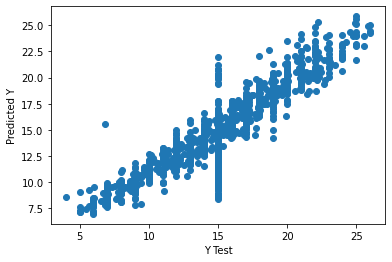

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# SVM model

In [15]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel='rbf')
SVM_regressor.fit(X_train, y_train)
y_pred=SVM_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error

correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for SVM model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for SVM model")
print(scorr)
print("Mean squared error for SVM model: %.2f" % mean_squared_error(y_test,y_pred))

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pearson Correlation for SVM model
0.9151525263298707
Spearman Correlation for SVM model
0.9169826167815335
Mean squared error for SVM model: 3.03


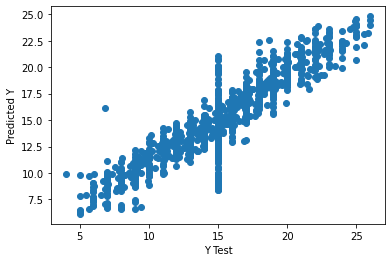

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision Tree Regression Model

In [17]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for DecisionTree model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for DecisionTree model")
print(scorr)
print("Mean squared error for DecisionTree model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for DecisionTree model
0.9760621428714142
Spearman Correlation for DecisionTree model
0.974849497577743
Mean squared error for DecisionTree model: 0.89


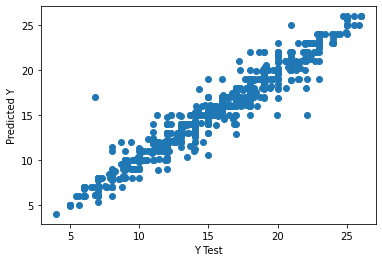

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNN Regression Model

RMSE value for k=  1 is: 1.8419051698998032
RMSE value for k=  2 is: 1.6192457928827724
RMSE value for k=  3 is: 1.5537919417381796
RMSE value for k=  4 is: 1.5000401098019458
RMSE value for k=  5 is: 1.5007207844756008
RMSE value for k=  6 is: 1.5160055670364807
RMSE value for k=  7 is: 1.5389468440145306
RMSE value for k=  8 is: 1.5540585327727063
RMSE value for k=  9 is: 1.5602123139929798
RMSE value for k=  10 is: 1.571735619317075
RMSE value for k=  11 is: 1.5967900381825266
RMSE value for k=  12 is: 1.6043479392433493
RMSE value for k=  13 is: 1.6221433780660737
RMSE value for k=  14 is: 1.6379487388694254
RMSE value for k=  15 is: 1.6548169957696879
RMSE value for k=  16 is: 1.6819008929201764
RMSE value for k=  17 is: 1.7021079464426652
RMSE value for k=  18 is: 1.7148649924973174
RMSE value for k=  19 is: 1.7259459630298986
RMSE value for k=  20 is: 1.7337487762274617


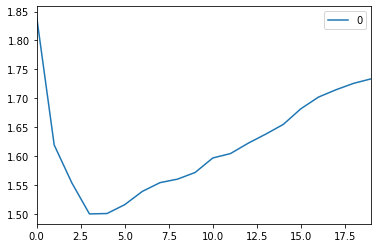

In [19]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [20]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for KNN model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for KNN model")
print(scorr)
print("Mean squared error for KNN model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for KNN model
0.9336596194575634
Spearman Correlation for KNN model
0.9353325250253227
Mean squared error for KNN model: 2.41


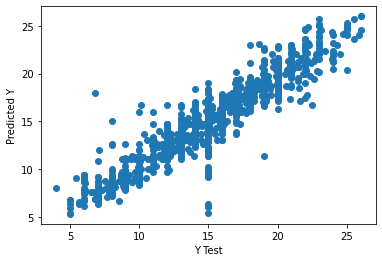

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Boosting Regression Model

In [22]:
from sklearn import ensemble
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for Boosting Regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for Boosting Regression model")
print(scorr)
print("Mean squared error for Boosting Regression model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for Boosting Regression model
0.9760179011292474
Spearman Correlation for Boosting Regression model
0.9712564407820194
Mean squared error for Boosting Regression model: 0.93


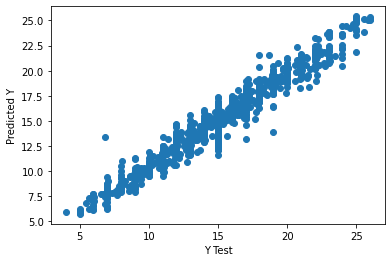

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Bagging Regression Model

In [24]:
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for Bagging Regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for Bagging Regression model")
print(scorr)
print("Mean squared error for Bagging Regression model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for Bagging Regression model
0.9852485664482417
Spearman Correlation for Bagging Regression model
0.9824687220441175
Mean squared error for Bagging Regression model: 0.56


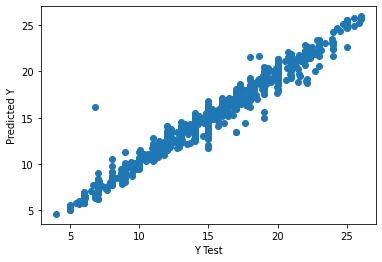

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Sequential Deep Learning Regression Model

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(40, input_dim=17, activation='relu'))
model.add(Dense(20, input_dim=17, activation='relu'))
model.add(Dense(1, activation='linear'))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [27]:
model.compile(loss='mse', optimizer= 'adam', metrics=['mse','mae'])
neural_train=model.fit(X_train, y_train, batch_size=15, epochs= 200, verbose=1)
print(model.summary())


Epoch 1/200
2895/2895 [==============================] - 1s 452us/step - loss: 68.7692 - mse: 68.7692 - mae: 6.2794
Epoch 2/200
2895/2895 [==============================] - 1s 261us/step - loss: 5.5941 - mse: 5.5941 - mae: 1.8510
Epoch 3/200
2895/2895 [==============================] - 1s 202us/step - loss: 4.4716 - mse: 4.4716 - mae: 1.6334
Epoch 4/200
2895/2895 [==============================] - 1s 252us/step - loss: 4.1130 - mse: 4.1129 - mae: 1.5574
Epoch 5/200
2895/2895 [==============================] - 1s 186us/step - loss: 3.8804 - mse: 3.8804 - mae: 1.4994
Epoch 6/200
2895/2895 [==============================] - 1s 185us/step - loss: 3.6397 - mse: 3.6397 - mae: 1.4393
Epoch 7/200
2895/2895 [==============================] - 1s 188us/step - loss: 3.5229 - mse: 3.5229 - mae: 1.4017
Epoch 8/200
2895/2895 [==============================] - 1s 243us/step - loss: 3.3952 - mse: 3.3952 - mae: 1.3645
Epoch 9/200
2895/2895 [==============================] - 1s 215us/step - loss: 3.3140

Epoch 70/200
2895/2895 [==============================] - 1s 272us/step - loss: 1.6781 - mse: 1.6781 - mae: 0.8917
Epoch 71/200
2895/2895 [==============================] - 1s 250us/step - loss: 1.6362 - mse: 1.6362 - mae: 0.8785
Epoch 72/200
2895/2895 [==============================] - 1s 283us/step - loss: 1.6585 - mse: 1.6585 - mae: 0.8858
Epoch 73/200
2895/2895 [==============================] - 1s 260us/step - loss: 1.6658 - mse: 1.6658 - mae: 0.8916
Epoch 74/200
2895/2895 [==============================] - 1s 279us/step - loss: 1.6421 - mse: 1.6421 - mae: 0.8799
Epoch 75/200
2895/2895 [==============================] - 1s 268us/step - loss: 1.6064 - mse: 1.6064 - mae: 0.8692
Epoch 76/200
2895/2895 [==============================] - 1s 253us/step - loss: 1.6088 - mse: 1.6088 - mae: 0.8718 1s - loss: 1.2077 - mse: 1.2077 
Epoch 77/200
2895/2895 [==============================] - 1s 248us/step - loss: 1.6359 - mse: 1.6359 - mae: 0.8863
Epoch 78/200
2895/2895 [=======================

dict_keys(['loss', 'mse', 'mae'])


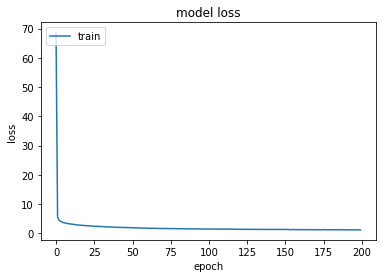

In [28]:
print(neural_train.history.keys())
# "Loss"
plt.plot(neural_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
pred= model.predict(X_test)
y_pred=[]
for i in range(0,1242):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])

In [30]:
y_Test = y_test.tolist()

In [31]:
correlation, p_value = stats.pearsonr(y_Test, y_pred)
print("Pearson Correlation for Sequential Deep Learning model")
print(correlation)
scorr, p = stats.spearmanr(y_Test, y_pred)
print("Spearman Correlation for Sequential Deep Learning model")
print(scorr)
print("Mean Squared Error for the Sequential Deep Learning Model")
print(np.sqrt(mean_squared_error(y_Test,y_pred))) 

Pearson Correlation for Sequential Deep Learning model
0.9685713878207263
Spearman Correlation for Sequential Deep Learning model
0.9652501228295829
Mean Squared Error for the Sequential Deep Learning Model
1.1428242113608005


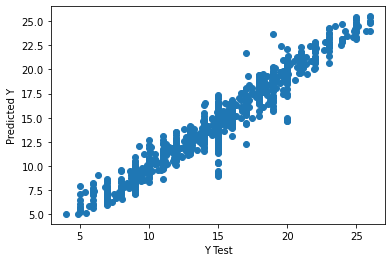

In [32]:
plt.scatter(y_Test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# LSTM Deep Learning Regression Model

In [33]:
print(X_train.shape); print(X_test.shape)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2895, 17)
(1242, 17)
(2895, 1, 17) (2895,) (1242, 1, 17) (1242,)


In [34]:
# Define model
from keras.layers import Dropout
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=300, batch_size=15, validation_data=(X_test, y_test), verbose=2, shuffle=False)
print(model.summary())

Train on 2895 samples, validate on 1242 samples
Epoch 1/300
 - 3s - loss: 138.0031 - val_loss: 17.5950
Epoch 2/300
 - 1s - loss: 13.0903 - val_loss: 9.4268
Epoch 3/300
 - 1s - loss: 8.3143 - val_loss: 6.9533
Epoch 4/300
 - 1s - loss: 6.4889 - val_loss: 6.0102
Epoch 5/300
 - 1s - loss: 5.7021 - val_loss: 5.5348
Epoch 6/300
 - 1s - loss: 5.2515 - val_loss: 5.1900
Epoch 7/300
 - 1s - loss: 4.9155 - val_loss: 4.8941
Epoch 8/300
 - 1s - loss: 4.6365 - val_loss: 4.6317
Epoch 9/300
 - 1s - loss: 4.3963 - val_loss: 4.3915
Epoch 10/300
 - 1s - loss: 4.1729 - val_loss: 4.1559
Epoch 11/300
 - 1s - loss: 3.9746 - val_loss: 3.9594
Epoch 12/300
 - 1s - loss: 3.8178 - val_loss: 3.8017
Epoch 13/300
 - 1s - loss: 3.6932 - val_loss: 3.6682
Epoch 14/300
 - 1s - loss: 3.5872 - val_loss: 3.5475
Epoch 15/300
 - 1s - loss: 3.4911 - val_loss: 3.4361
Epoch 16/300
 - 1s - loss: 3.4038 - val_loss: 3.3382
Epoch 17/300
 - 1s - loss: 3.3287 - val_loss: 3.2562
Epoch 18/300
 - 1s - loss: 3.2649 - val_loss: 3.1862
Epo

Epoch 154/300
 - 1s - loss: 1.6990 - val_loss: 1.6844
Epoch 155/300
 - 1s - loss: 1.6965 - val_loss: 1.6817
Epoch 156/300
 - 1s - loss: 1.6929 - val_loss: 1.6804
Epoch 157/300
 - 1s - loss: 1.6902 - val_loss: 1.6765
Epoch 158/300
 - 1s - loss: 1.6868 - val_loss: 1.6753
Epoch 159/300
 - 1s - loss: 1.6839 - val_loss: 1.6730
Epoch 160/300
 - 1s - loss: 1.6809 - val_loss: 1.6715
Epoch 161/300
 - 1s - loss: 1.6783 - val_loss: 1.6685
Epoch 162/300
 - 1s - loss: 1.6752 - val_loss: 1.6676
Epoch 163/300
 - 1s - loss: 1.6727 - val_loss: 1.6637
Epoch 164/300
 - 1s - loss: 1.6700 - val_loss: 1.6618
Epoch 165/300
 - 1s - loss: 1.6668 - val_loss: 1.6600
Epoch 166/300
 - 1s - loss: 1.6641 - val_loss: 1.6588
Epoch 167/300
 - 1s - loss: 1.6606 - val_loss: 1.6574
Epoch 168/300
 - 1s - loss: 1.6579 - val_loss: 1.6546
Epoch 169/300
 - 1s - loss: 1.6548 - val_loss: 1.6543
Epoch 170/300
 - 1s - loss: 1.6523 - val_loss: 1.6522
Epoch 171/300
 - 1s - loss: 1.6496 - val_loss: 1.6502
Epoch 172/300
 - 1s - loss: 

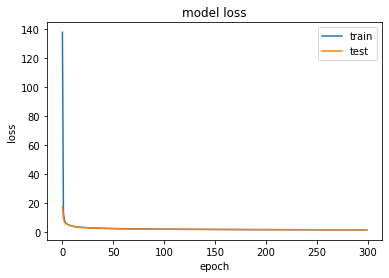

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
pred = model.predict(X_test)

In [37]:
y_pred=[]
for i in range(0,1242):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])
y_Test = y_test.tolist()

In [38]:
correlation, p_value = stats.pearsonr(y_Test, y_pred)
print("Pearson Correlation for LSTM Deep Learning model")
print(correlation)
scorr, p = stats.spearmanr(y_Test, y_pred)
print("Spearman Correlation for LSTM Deep Learning model")
print(scorr)
print("Mean Squared Error for the LSTM Deep Learning Model")
print(np.sqrt(mean_squared_error(y_Test,y_pred))) 

Pearson Correlation for LSTM Deep Learning model
0.9616773649923381
Spearman Correlation for LSTM Deep Learning model
0.9604494338871654
Mean Squared Error for the LSTM Deep Learning Model
1.213872040530218


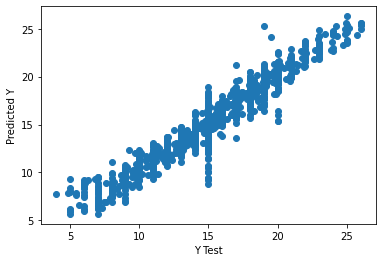

In [39]:
plt.scatter(y_Test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()